In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Find the best hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score


from collections import Counter



from scipy.stats import ttest_ind

In [1]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 84.6/84.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111946 sha256=1ba5d88c12b263a95600a808c29fcef8acb05ce3d57c402de329e738098d4f2d
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\46\aa\c3\b3e421522fb5acdd7c366a05c5fc80787615bdeed207e7f79b
Successfully built kaggle


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhavyaray
Your Kaggle Key: ········


100%|██████████| 66.0M/66.0M [00:13<00:00, 5.31MB/s]


In [4]:
import os

In [5]:
data_dir = '.\creditcardfraud'

In [6]:
os.listdir(data_dir)

['creditcard.csv']

In [4]:
# Read the data
df=pd.read_csv('creditcard.csv')
# Shape the data
df.shape

(284807, 31)

In [53]:
# Get head of the data
df.head(200)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,128.0,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
196,130.0,-0.485238,0.658497,1.949967,1.249695,0.426410,0.231513,0.585115,0.029163,-0.520297,...,0.007290,0.328244,-0.232563,0.225572,0.025892,-0.247395,-0.025381,-0.118565,5.97,0
197,130.0,1.353283,-0.694900,0.970826,-0.426559,-1.417263,-0.505710,-0.932069,-0.083957,-0.224208,...,0.284341,0.993434,-0.164893,0.474257,0.623848,-0.006750,0.046026,0.022043,15.93,0
198,131.0,-1.007391,1.261943,1.207203,1.307575,0.153211,0.062291,0.508647,0.079447,-0.395211,...,0.039150,0.411661,-0.080320,0.121235,-0.133000,-0.303177,-0.463913,-0.164157,10.00,0


In [54]:
df.tail(200)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284607,172595.0,-0.128780,1.290989,-0.584634,-0.424729,1.068268,-0.951651,1.119394,-0.289588,-0.040139,...,0.258380,0.978741,-0.346699,-0.708009,-0.335079,-0.116525,0.344570,0.294544,4.39,0
284608,172599.0,-0.195044,1.238305,-0.768720,-0.178302,0.582600,-1.282570,0.946855,-0.129767,-0.040571,...,0.365673,1.207021,-0.111128,-0.162594,-0.896012,-0.259841,-0.131265,-0.005010,18.16,0
284609,172599.0,2.035871,-0.069877,-1.168968,0.208965,0.162972,-0.601478,0.101776,-0.176646,0.207296,...,-0.246570,-0.571288,0.287104,-0.378273,-0.278012,0.201952,-0.067508,-0.072807,0.89,0
284610,172602.0,-3.849825,3.978385,-5.138427,-0.756156,-1.496193,-1.344611,-1.733808,3.273432,-0.870490,...,0.601646,0.576961,0.213363,0.046459,0.381029,-0.417428,-1.409201,-0.350954,11.76,0
284611,172604.0,-0.853878,0.781617,1.379211,-0.846809,0.073660,0.074457,0.224597,0.069018,0.286244,...,0.280279,0.962593,-0.298727,-0.248777,-0.321043,0.510994,-0.029603,0.222621,10.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# ANALYSIS

In [55]:
df.isnull().values.any()

False

In [56]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [57]:
class_counts = df['Class'].value_counts()
labels = ['Genuine', 'Fraud']
colors = ['#66b3ff', '#ff9999']

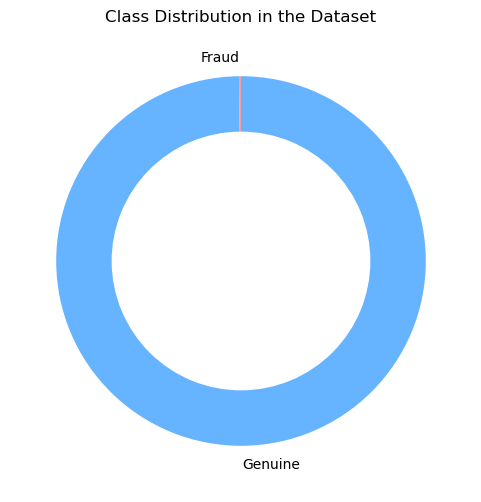

In [58]:
# Create a circle for the center of the flower plot
center_circle = plt.Circle((0, 0), 0.5, color='white')

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, colors=colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
p = plt.gcf()
p.gca().add_artist(center_circle)

plt.title('Class Distribution in the Dataset')

plt.show()

In [59]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [60]:
# Displaying all the columns in the dataset
print("\nColumns in the dataset:")
df.columns


Columns in the dataset:


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [61]:
# Checking for missing values in the dataset
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


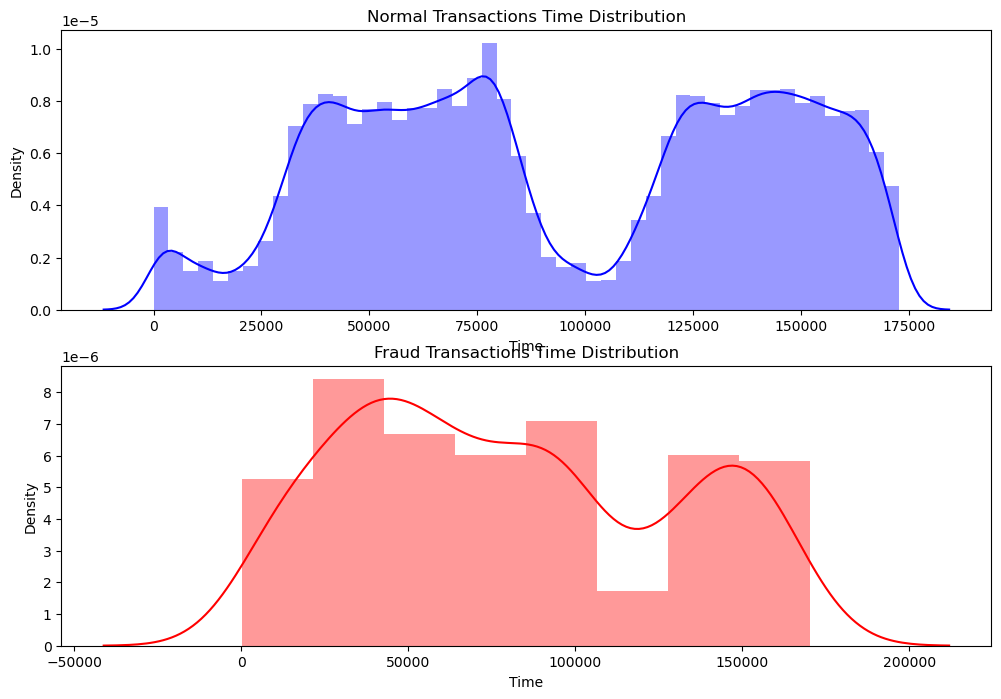

In [62]:
# Visualizing the distribution of transactions over time for fraudulent and genuine transactions in more detail
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.distplot(df[df['Class'] == 0]["Time"], color='b')
plt.title('Normal Transactions Time Distribution')
plt.subplot(2, 1, 2)
sns.distplot(df[df['Class'] == 1]["Time"], color='r')
plt.title('Fraud Transactions Time Distribution')
plt.show()

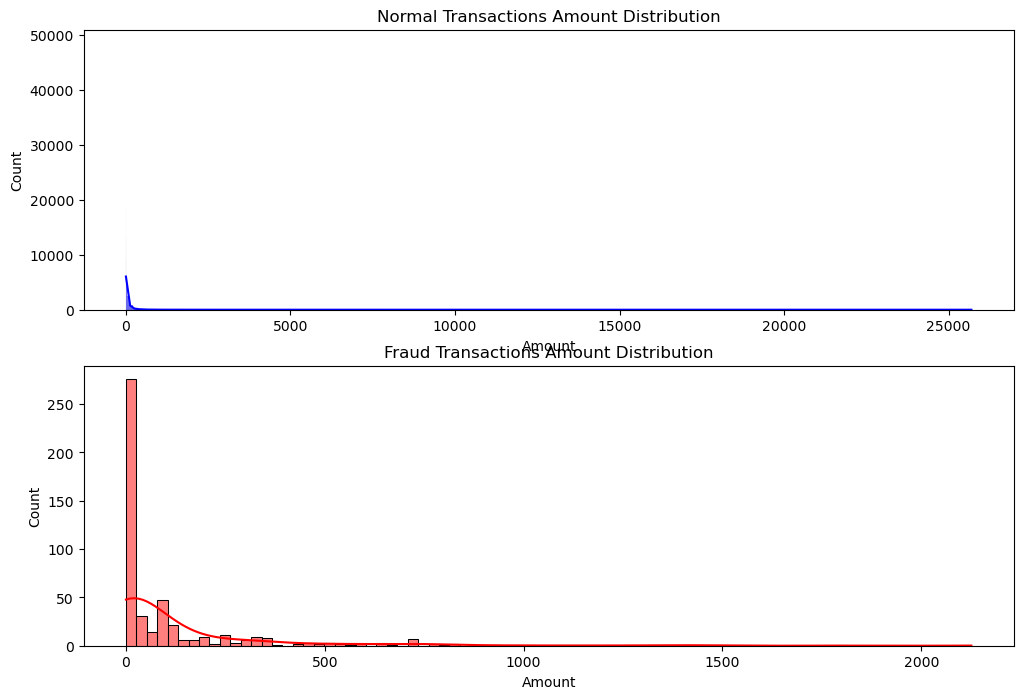

In [63]:
# Visualizing the distribution of transaction amounts for fraudulent and genuine transactions in more detail
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(df[df['Class'] == 0]["Amount"], color='b', kde=True)
plt.title('Normal Transactions Amount Distribution')
plt.subplot(2, 1, 2)
sns.histplot(df[df['Class'] == 1]["Amount"], color='r', kde=True)
plt.title('Fraud Transactions Amount Distribution')
plt.show()

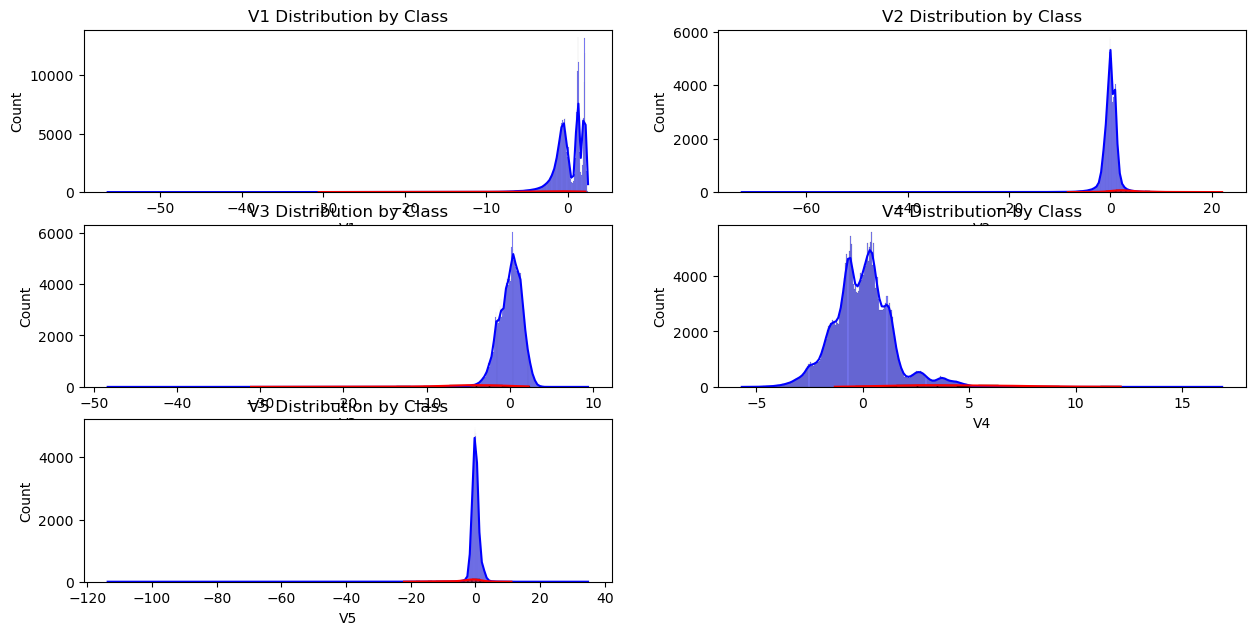

In [68]:
# Analyzing the distribution of other features for fraudulent and genuine transactions (e.g., V1, V2, etc.)
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15, 35))
for i, feature in enumerate(features, 1):
    plt.subplot(14, 2, i)
    sns.histplot(df[df['Class'] == 0][feature], color='b', kde=True)
    sns.histplot(df[df['Class'] == 1][feature], color='r', kde=True)
    plt.title(f'{feature} Distribution by Class')
plt.show()

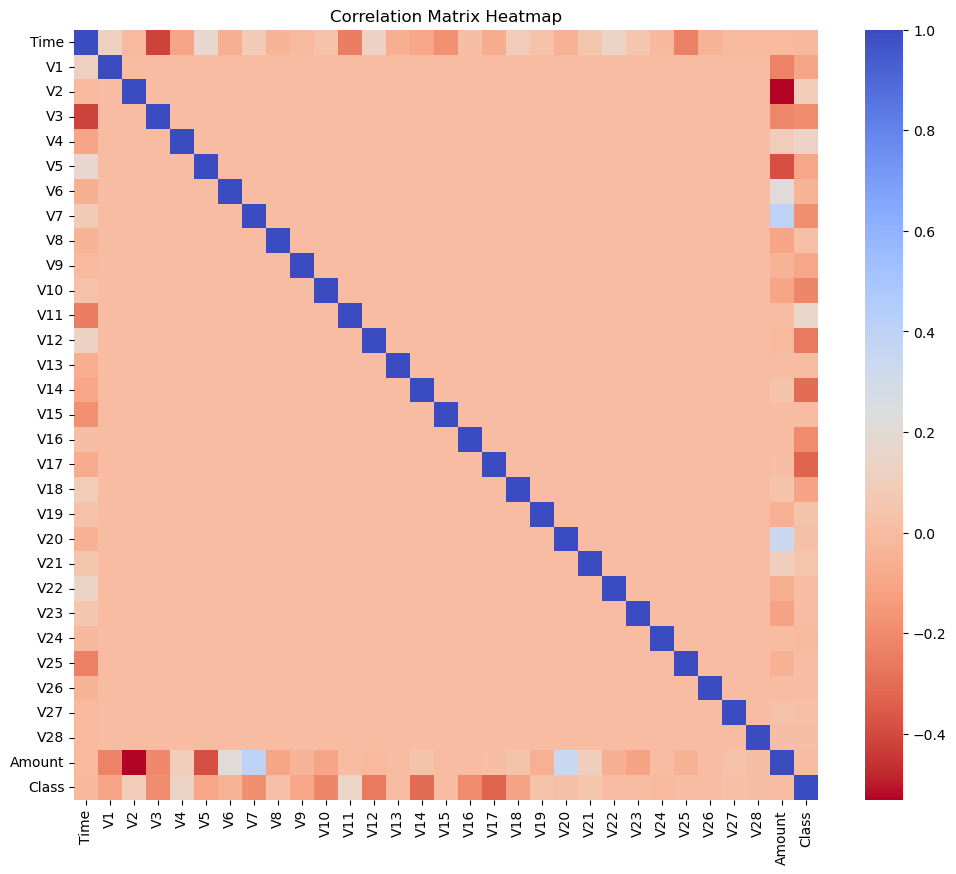

In [65]:
# Analyzing the correlation between features using a heatmap
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

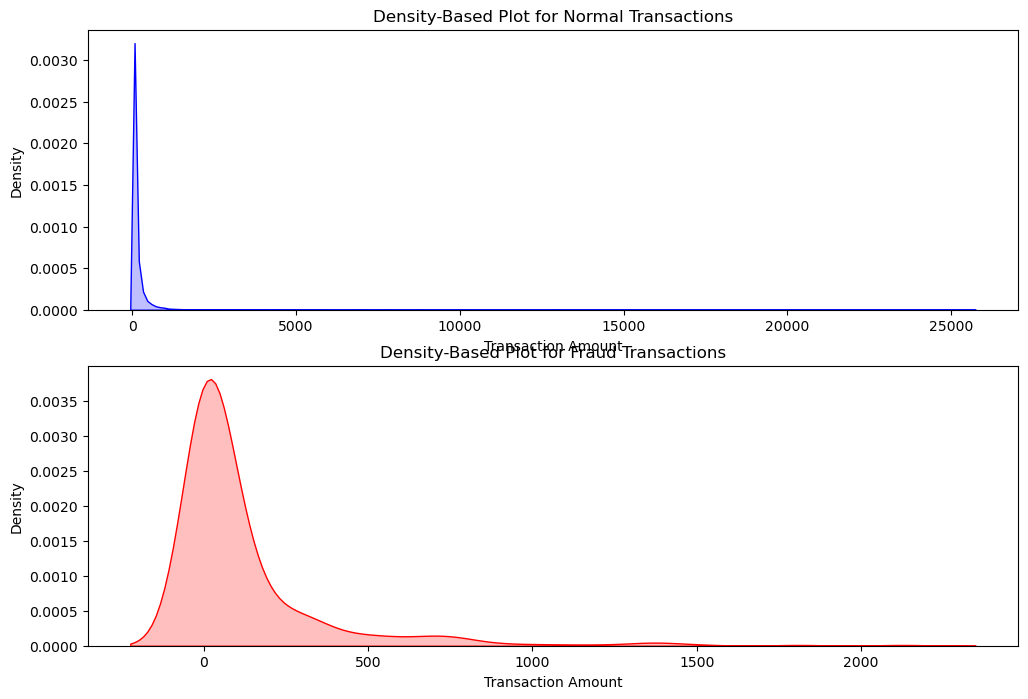

In [66]:
# Density-based plots for fraud and genuine transactions
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.kdeplot(df[df['Class'] == 0]["Amount"], shade=True, color='b', label='Normal Transactions')
plt.title('Density-Based Plot for Normal Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.subplot(2, 1, 2)
sns.kdeplot(df[df['Class'] == 1]["Amount"], shade=True, color='r', label='Fraud Transactions')
plt.title('Density-Based Plot for Fraud Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

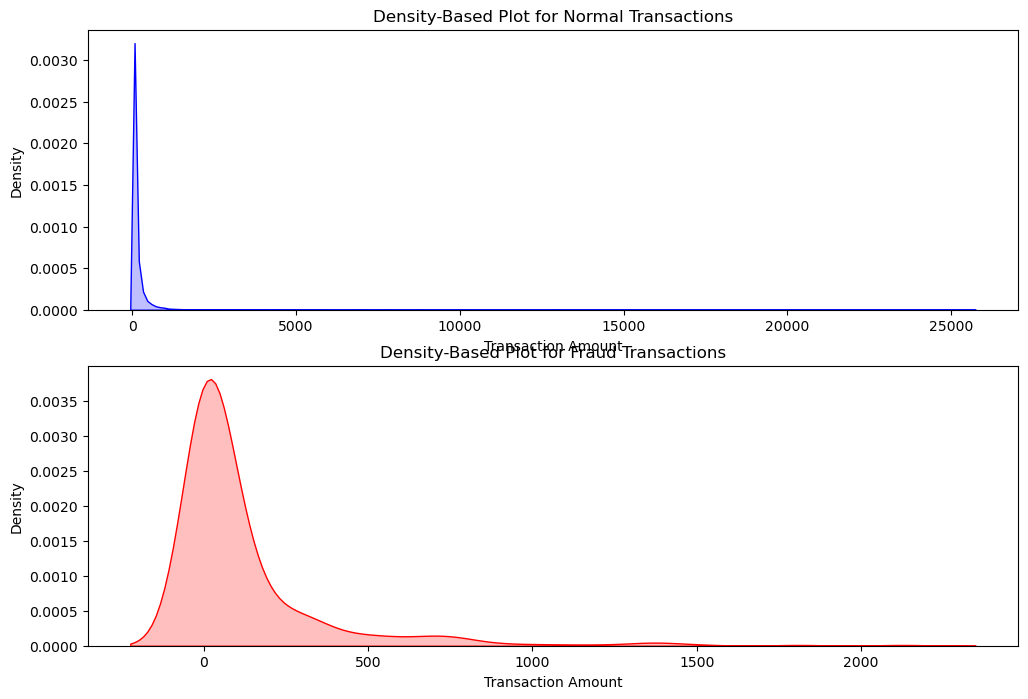

In [67]:
# Density-based plots for fraud and genuine transactions
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.kdeplot(df[df['Class'] == 0]["Amount"], shade=True, color='b', label='Normal Transactions')
plt.title('Density-Based Plot for Normal Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.subplot(2, 1, 2)
sns.kdeplot(df[df['Class'] == 1]["Amount"], shade=True, color='r', label='Fraud Transactions')
plt.title('Density-Based Plot for Fraud Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

# Performing t-test 

In [69]:

normal_transactions = df[df['Class'] == 0]['Amount']
fraud_transactions = df[df['Class'] == 1]['Amount']
t_stat, p_val = ttest_ind(normal_transactions, fraud_transactions)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -3.00555231397141, P-value: 0.002651220649191683


In [27]:
# Implementing Isolation Forest for anomaly detection
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=42)

In [30]:

y_pred = model.predict(X_test)

# classification report

In [73]:

print("Classification Report for Anomaly Detection Model:")
print(classification_report(y_test, y_pred))

Classification Report for Anomaly Detection Model:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     56864
           1       0.00      0.37      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.12      0.00     56962
weighted avg       0.00      0.00      0.00     56962



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [74]:

firewall_data = df[df['Amount'] > 1000]  
fraudulent_firewall_transactions = firewall_data[firewall_data['Class'] == 1]
print("Fraudulent Transactions within Firewall:")
print(fraudulent_firewall_transactions)

Fraudulent Transactions within Firewall:
            Time         V1        V2         V3        V4        V5  \
6971      9064.0  -3.499108  0.258555  -4.489558  4.853894 -6.974522   
10690    18088.0 -12.224021  3.854150 -12.466766  9.648311 -2.726961   
81609    59011.0  -2.326922 -3.348439  -3.513408  3.175060 -2.815137   
89190    62467.0  -5.344665 -0.285760  -3.835616  5.337048 -7.609909   
95597    65385.0  -2.923827  1.524837  -3.018758  3.289291 -5.755542   
176049  122608.0  -2.003460 -7.159042  -4.050976  1.309580 -2.058102   
199896  133184.0  -1.212682 -2.484824  -6.397186  3.670562 -0.863375   
249167  154278.0  -1.600211 -3.488130  -6.459303  3.246816 -1.614608   
249239  154309.0  -0.082983 -3.935919  -2.616709  0.163310 -1.400952   

              V6         V7        V8        V9  ...       V21       V22  \
6971    3.628382   5.431271 -1.946734 -0.775680  ... -1.052368  0.204817   
10690  -4.445610 -21.922811  0.320792 -4.433162  ... -1.159830 -1.504119   
81609  -0.

In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']}
solver = 'liblinear'

# Splitting the datasets

In [36]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:

grid_search = GridSearchCV(LogisticRegression(solver=solver, max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best parameter combinations: ", best_params)

Best parameter combinations:  {'C': 10, 'penalty': 'l2'}


In [38]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 257.7/257.7 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 2.3 MB/s eta 0:00:00


In [39]:
from imblearn.over_sampling import SMOTE

In [40]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [41]:

print("Original data shape:", X_train.shape, y_train.shape)
print("Resampled data shape:", X_resampled.shape, y_resampled.shape)

Original data shape: (227845, 30) (227845,)
Resampled data shape: (454902, 30) (454902,)


# using machine learning algorithms

In [87]:
from xgboost import XGBClassifier

In [88]:
# Training the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [89]:
# Evaluating the performance of the XGBoost model
print("Classification Report for XGBoost Model:")
print(classification_report(y_test, y_pred_xgb))

Classification Report for XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



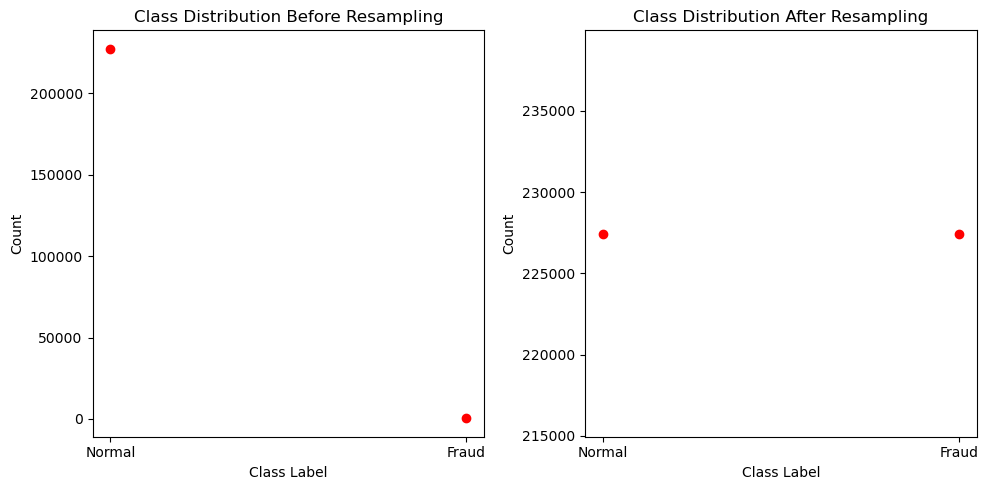

In [90]:

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title('Class Distribution Before Resampling')
plt.plot([0, 1], [sum(y_train==0), sum(y_train==1)], 'ro')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Class Label')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
plt.title('Class Distribution After Resampling')
plt.plot([0, 1], [sum(y_resampled==0), sum(y_resampled==1)], 'ro')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns=['Class'])
y = df['Class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Perform PCA

In [6]:

pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


print("Number of principal components:", pca.n_components_)

Number of principal components: 27


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
models=[]
results=[]
names=[]


In [18]:
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))


In [19]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

# Data sampling

In [92]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled_aug, y_resampled_aug = ros.fit_resample(X, y)

In [93]:

print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled_aug))

Original dataset shape: Counter({0: 284315, 1: 492})
Resampled dataset shape: Counter({0: 284315, 1: 284315})


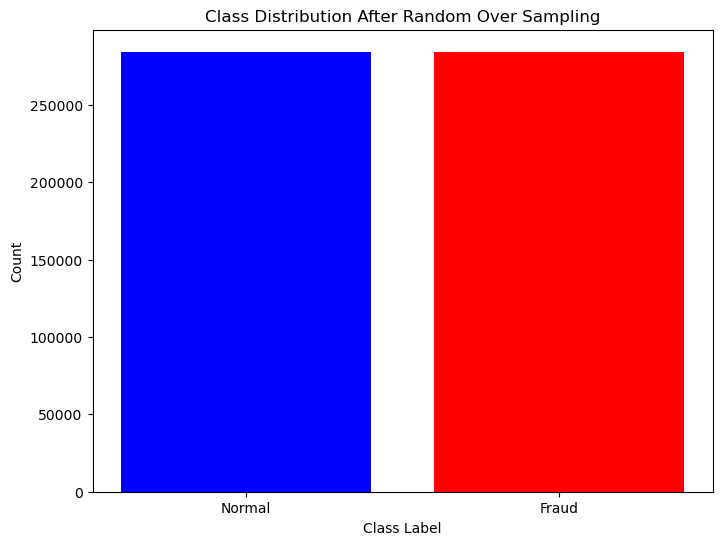

In [94]:

plt.figure(figsize=(8, 6))
plt.bar(Counter(y_resampled_aug).keys(), Counter(y_resampled_aug).values(), color=['b', 'r'])
plt.xticks(list(Counter(y_resampled_aug).keys()), ['Normal', 'Fraud'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution After Random Over Sampling')
plt.show()

In [42]:
from sklearn import model_selection
for name,model in models:
  kfold=model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
  cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.998975 (0.000164)
LDA: 0.999386 (0.000147)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN: 0.998385 (0.000250)
CART: 0.999161 (0.000127)
NB: 0.992858 (0.000583)
SVM: 0.998273 (0.000279)


# Calculate precision, recall, and F1 scores

In [43]:

precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.0006320002808890137
Recall:  0.0006320002808890137
F1 Score:  0.0006320002808890137


In [96]:

metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

# dot plot

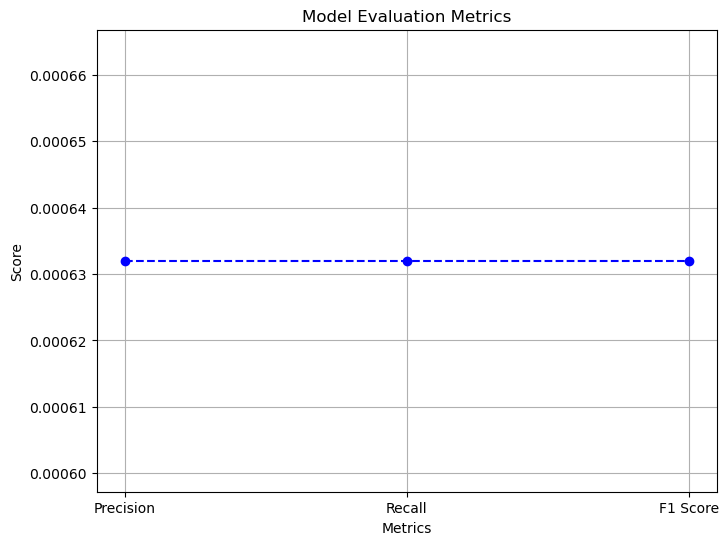

In [97]:

plt.figure(figsize=(8, 6))
plt.plot(metrics, scores, marker='o', linestyle='--', color='b')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [99]:

# Check for missing data
missing_values = df.isnull().sum()
print("Missing values: ", missing_values)

Missing values:  Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [101]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# heatmap

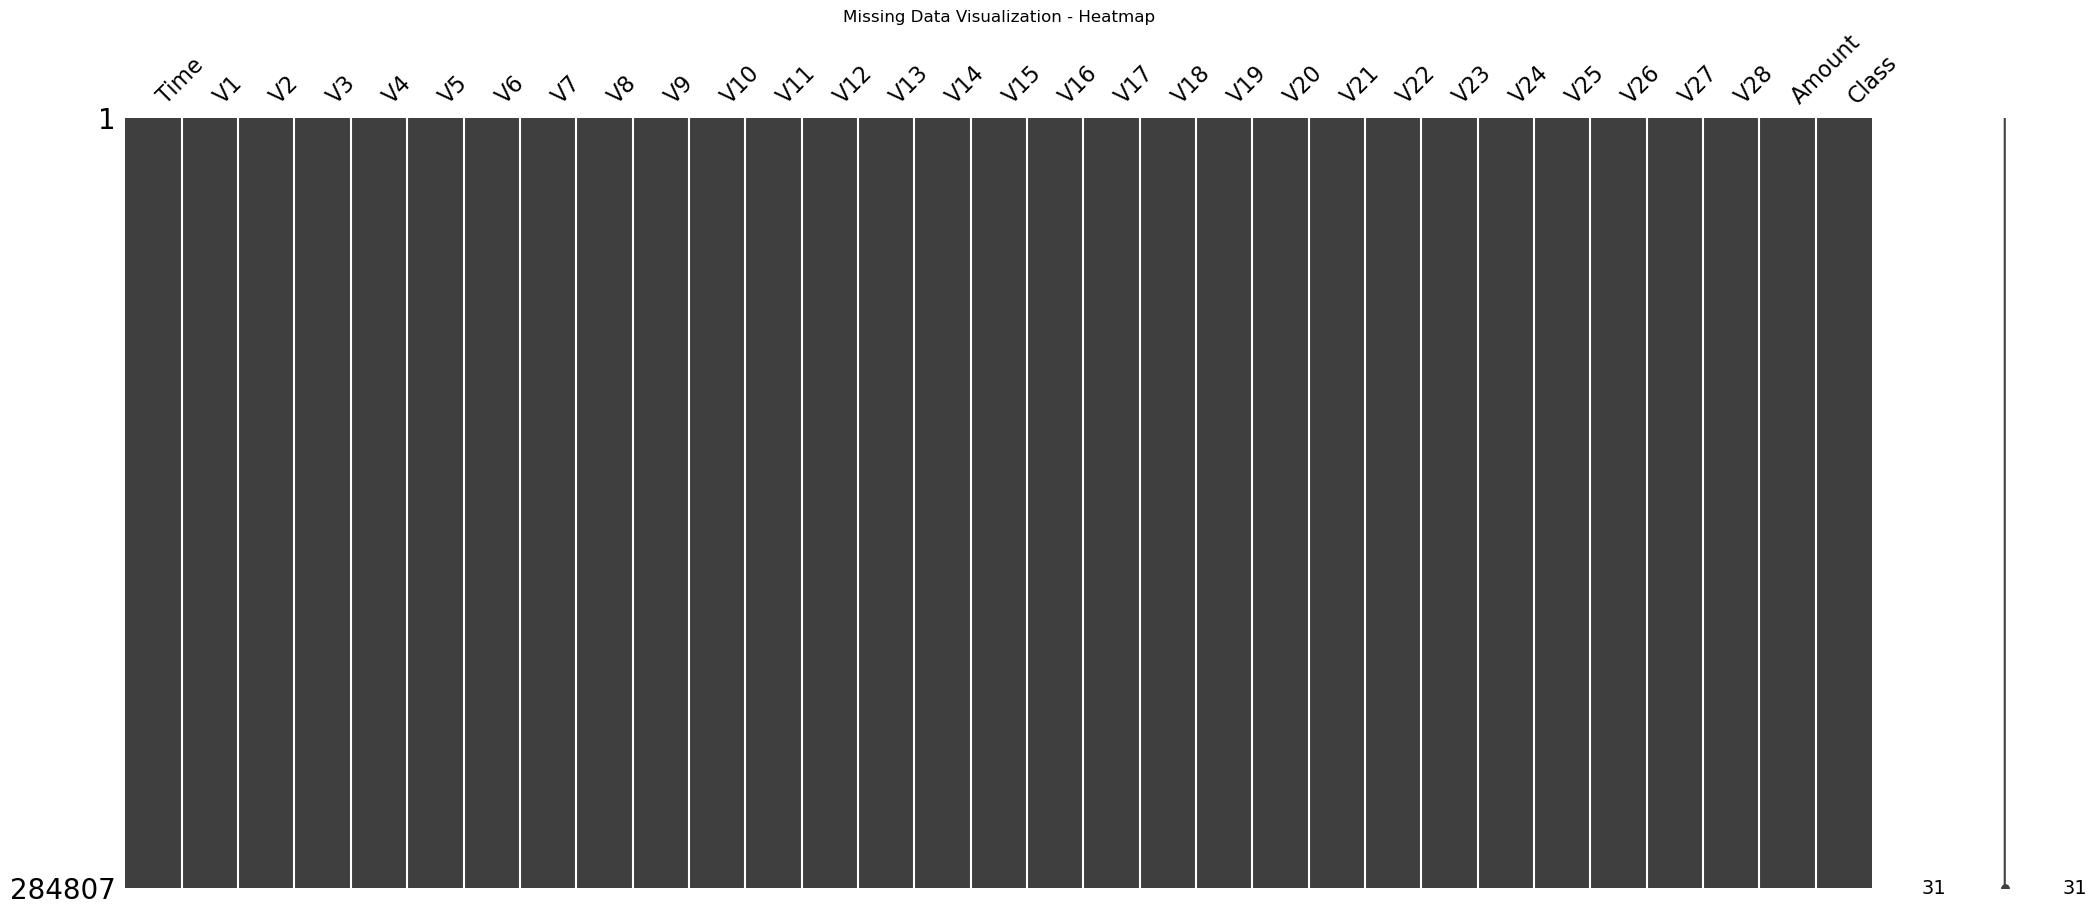

In [102]:
import missingno as msno


msno.matrix(df)
plt.title('Missing Data Visualization - Heatmap')
plt.show()

In [103]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 450.3/450.3 kB 2.6 MB/s eta 0:00:00


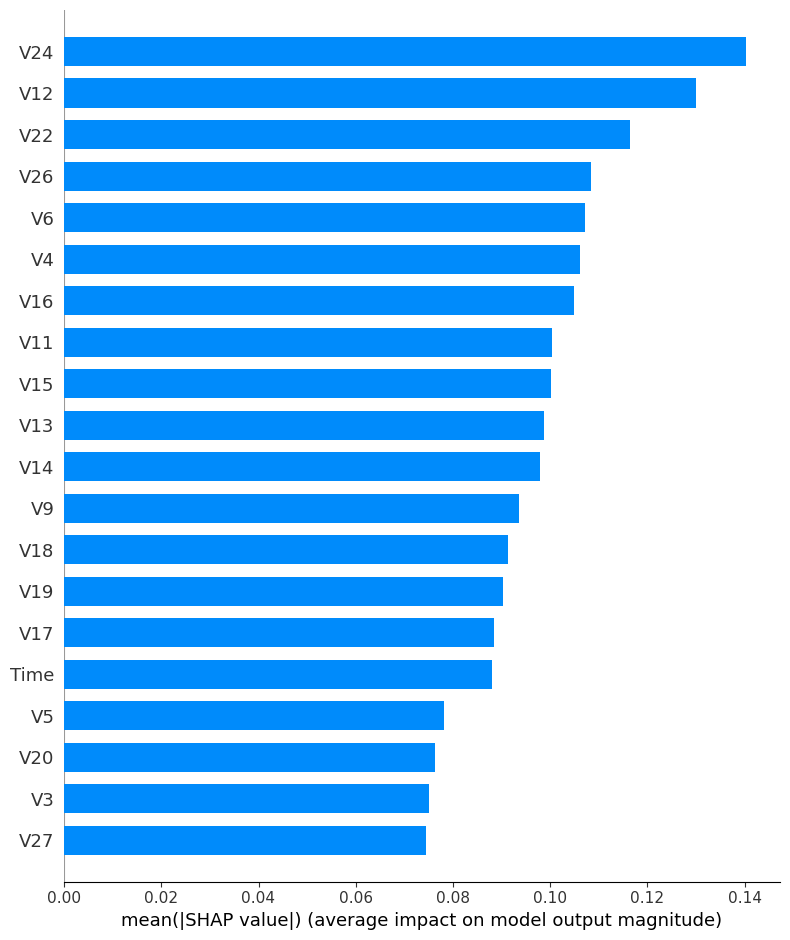

In [104]:
import shap
# Use SHAP values for model interpretation
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# ConfusionMatrix

In [22]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report, ConfusionMatrixDisplay


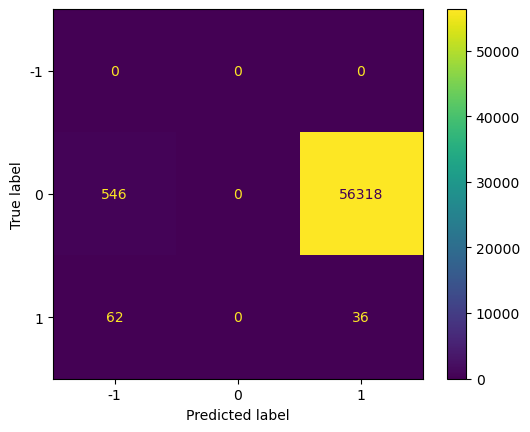

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)